In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
homedir = os.getenv("HOME")

# Sample selection

* logMstar > 9 to ensure CO detection
* limit to core?
* compare core and infall?
* limit by inclination so that we can match with Halpha and/or UV 
* remove a few clusters?


In [69]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9. --ellip 0.75 --HIdef --minssfr -11.5 
massflag = b.lcs.cat['logMstar'] < 10.
cflag = b.lcs.sampleflag & (b.lcs.membflag ) & b.lcs_mass_sfr_flag & massflag
print('number of core galaxies = {}'.format(np.sum(cflag)))
iflag = b.lcs.sampleflag & (b.lcs.infallflag ) & b.lcs_mass_sfr_flag & massflag
print('number of infall galaxies = {}'.format(np.sum(iflag)))

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
number of core galaxies = 50
number of infall galaxies = 44


(array([193., 202., 303., 319., 306., 295., 324., 280., 289., 248.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 ], dtype=float32),
 <a list of 10 Patch objects>)

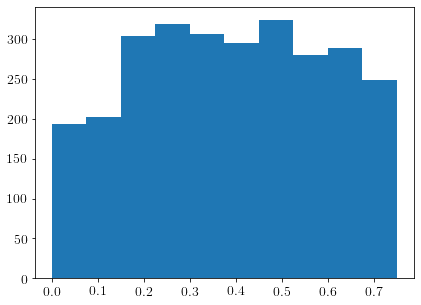

In [72]:
plt.figure()
plt.hist(b.lcs.cat[ellipkey])

In [78]:
b.lcs.cat.colnames == 'CLUSTER_2'

False

10 10


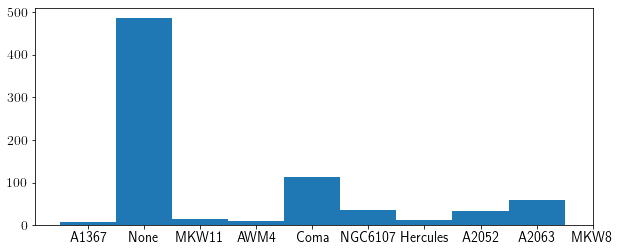

In [106]:
clusternames = set(b.lcs.cat['CLUSTER_2'])
#print(list(clusternames))                   
clusternames = list(clusternames)
yhist = np.zeros(len(b.lcs.cat))
mybins = np.arange(len(clusternames))
for i,c in enumerate(clusternames):
    flag = b.lcs.cat['CLUSTER_2'] == c
    yhist[flag] = i*np.ones(np.sum(flag))
plt.figure(figsize=(10,4))
t=plt.hist(yhist,bins=mybins)
#print(t[1])
xtick = np.arange(len(clusternames))
print(len(xtick),len(clusternames))
clusternames[1] = 'None'
t=plt.xticks(ticks=xtick+0.5,labels=clusternames)

In [93]:
clusternames

['A1367   ',
 '        ',
 'MKW11   ',
 'AWM4    ',
 'Coma    ',
 'NGC6107 ',
 'Hercules',
 'A2052   ',
 'A2063   ',
 'MKW8    ']

In [33]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9. --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
massflag = b.lcs.cat['logMstar'] < 10.
cflag = b.lcs.sampleflag & (b.lcs.membflag ) & b.lcs_mass_sfr_flag & massflag
print('number of core galaxies = {}'.format(np.sum(cflag)))
iflag = b.lcs.sampleflag & (b.lcs.infallflag ) & b.lcs_mass_sfr_flag & massflag
print('number of infall galaxies = {}'.format(np.sum(iflag)))

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
number of core galaxies = 42
number of infall galaxies = 41


number of infall galaxies = 66


# $\Delta$ SFR vs Size Ratio

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
number in sampleflag =  -- 2759
number in membflag =  1164 2759
number in both =  --
number in both and in sfr/mstar cut =  --
fraction of core with dsfr below 0.3dex = 0.186 (16/86)
fraction of core with dsfr below 0.3dex = 0.165 (13/79)
just checking ... 84 76
0.006496057178538641
0.0037493775865822675
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.29
p-vale = 1.841e-03 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=4.206657460524274, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.006758183093127425)

COLOR
KS Test:
D =   0.13
p-vale = 4.514e-01 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ks

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3632674bd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f363a98d790>)

<Figure size 489.6x360 with 0 Axes>

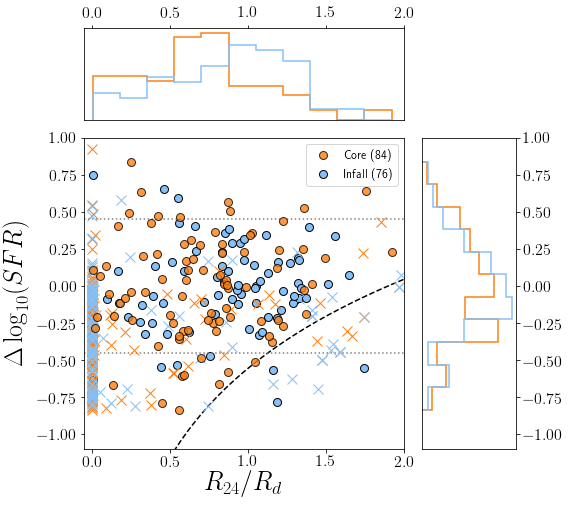

In [41]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9. --ellip 0.75 --HIdef --minssfr -11.5 
b.plot_dsfr_sizeratio()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.6
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
number in sampleflag =  -- 1483
number in membflag =  626 1483
number in both =  --
number in both and in sfr/mstar cut =  --
fraction of core with dsfr below 0.3dex = 0.125 (6/48)
fraction of core with dsfr below 0.3dex = 0.133 (6/45)
just checking ... 47 45
0.01836510917059126
0.0037493775865822675
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.30
p-vale = 2.289e-02 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=2.1133365465835574, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.043839670470887916)

COLOR
KS Test:
D =   0.12
p-vale = 8.460e-01 (prob tha

<Figure size 489.6x360 with 0 Axes>

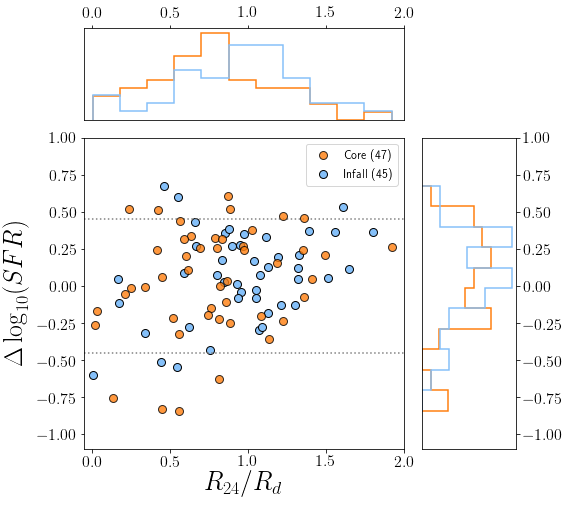

In [127]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 8. --ellip 0.5 --HIdef --minssfr -11.5 --cutBT --BT 0.6
b.plot_dsfr_sizeratio(maxmass=12,apexflag=True)
plt.savefig('apex_dsfr_sizeratio.png')
plt.savefig('apex_dsfr_sizeratio.pdf')

# Get LCS Images

In [135]:
b.lcs.cat['SIGMA_NN']

--
0.006842121
0.011100604
--
0.0069371485
--
--
--
0.017419104
--
--


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.65
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
78


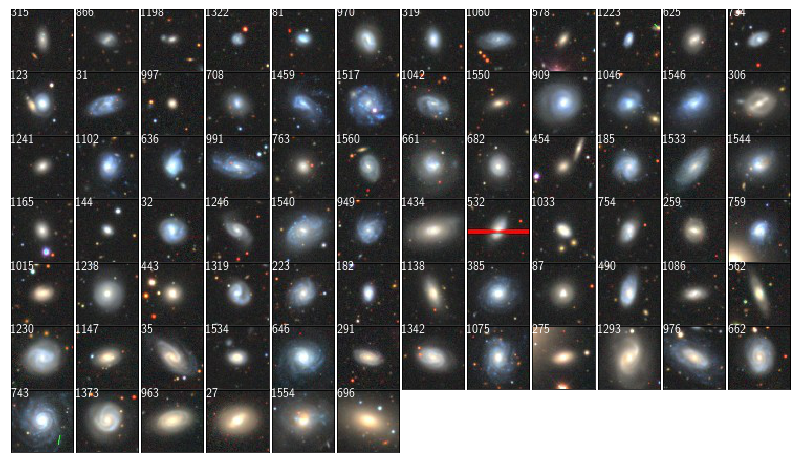

In [157]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.5 --ellip 0.5 --HIdef --minssfr -11.5 --cutBT --BT 0.65
decflag = b.lcs.cat['DEC'] < 90.
apexflag = b.lcs.sampleflag & (b.lcs.membflag | b.lcs.infallflag) & b.lcs_mass_sfr_flag & decflag
print(np.sum(apexflag))
b.get_legacy_images_1flag(apexflag,sortbymass=True,nrow=12,ncol=12,titleflag=False,apexflag=True)
plt.savefig('apex_sizesample_bymass_collage.png')
plt.savefig('apex_sizesample_bymass_collage.pdf')


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.65
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
78


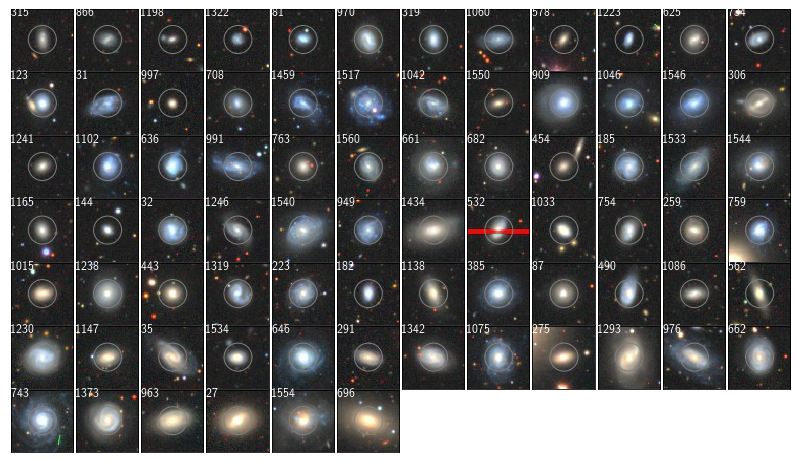

In [192]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.5 --ellip 0.5 --HIdef --minssfr -11.5 --cutBT --BT 0.65
decflag = b.lcs.cat['DEC'] < 90.

apexflag = b.lcs.sampleflag & (b.lcs.membflag | b.lcs.infallflag) & b.lcs_mass_sfr_flag & decflag
#id_doubles = np.array([1198,123,454,1033,275,696],'i')
#apexflag[id_doubles] = np.zeros(len(id_doubles),'bool')
print(np.sum(apexflag))
b.get_legacy_images_1flag(apexflag,sortbymass=True,nrow=12,ncol=12,titleflag=False,apexflag=True)
plt.savefig('apex_sizesample_bymass_collage.png')
plt.savefig('apex_sizesample_bymass_collage.pdf')

In [ ]:
# gals that need two pointing
# 696
# 743 - 4 pointings

In [197]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.5 --ellip 0.45 --HIdef --minssfr -11.5 --cutBT --BT 0.65
sortby = b.lcs.sizeratio[apexflag] 
b.get_legacy_images_1flag(apexflag,sortbymass=False,sortby=sortby,nrow=12,ncol=12,titleflag=False,apexflag=True)
plt.savefig('apex_sizesample_bysize_collage.png')
plt.savefig('apex_sizesample_bysize_collage.pdf')

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.65
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1374 but corresponding boolean dimension is 1563

In [163]:
10*15

150

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.7
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
78


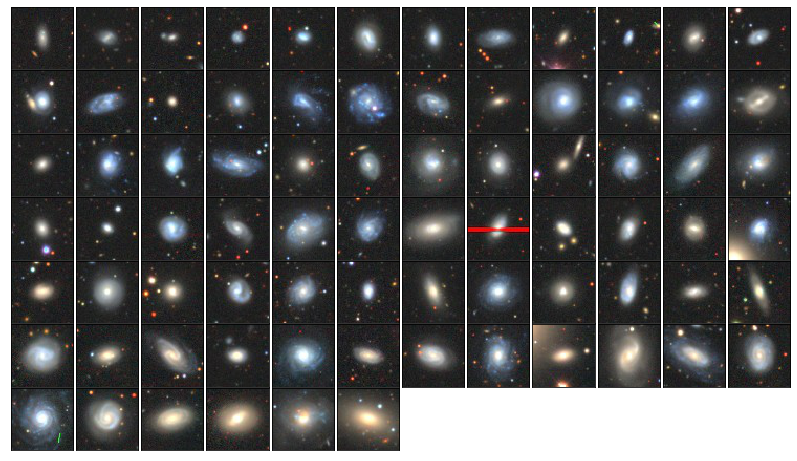

In [142]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.5 --ellip 0.5 --HIdef --minssfr -11.5 --cutBT --BT 0.7
decflag = b.lcs.cat['DEC'] < 90.
apexflag = b.lcs.sampleflag & (b.lcs.membflag | b.lcs.infallflag) & b.lcs_mass_sfr_flag & decflag
print(np.sum(apexflag))
b.get_legacy_images_1flag(apexflag,sortbymass=True,nrow=12,ncol=12,titleflag=False)
plt.savefig('apex_sizesample_bymass_collage.png')
plt.savefig('apex_sizesample_bymass_collage.pdf')


['A1367   ', 'MKW11   ', 'AWM4    ', 'Coma    ', 'NGC6107 ', 'Hercules', 'A2052   ', 'A2063   ', 'MKW8    ']
9 9


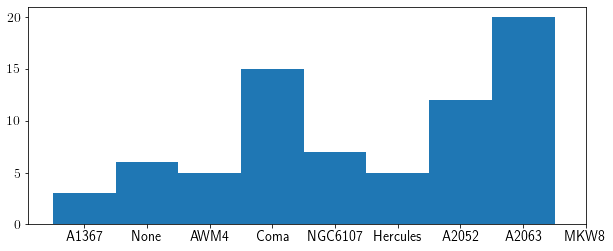

In [115]:

sflag = b.lcs.sampleflag & (b.lcs.membflag | b.lcs.infallflag) & b.lcs_mass_sfr_flag
clusternames = set(b.lcs.cat['CLUSTER_2'][sflag])
print(list(clusternames))                   
clusternames = list(clusternames)
yhist = np.zeros(len(b.lcs.cat[sflag]))
mybins = np.arange(len(clusternames))
for i,c in enumerate(clusternames):
    flag = b.lcs.cat['CLUSTER_2'][sflag] == c
    yhist[flag] = i*np.ones(np.sum(flag))
plt.figure(figsize=(10,4))
t=plt.hist(yhist,bins=mybins)
#print(t[1])
xtick = np.arange(len(clusternames))
print(len(xtick),len(clusternames))
clusternames[1] = 'None'
t=plt.xticks(ticks=xtick+0.5,labels=clusternames)

# Plot main sequence with field and size sample

In [ ]:
os.chdir(homedir+'/research/LCS/plots/')
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9. --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3

In [68]:
x = np.random.random(20)
x[np.argsort(x)]

array([0.06894572, 0.1269113 , 0.12792437, 0.17550001, 0.18894904,
       0.20390255, 0.24137914, 0.27395864, 0.4334113 , 0.52550051,
       0.56378732, 0.61153018, 0.710116  , 0.76396312, 0.77822098,
       0.82521864, 0.86918982, 0.89862948, 0.96009892, 0.96452894])

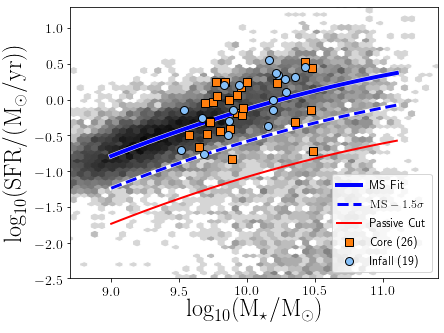

In [169]:

b.plot_full_ms(apexflag=True)
baseflag = b.lcs.sampleflag & b.lcs_mass_sfr_flag & (b.lcs.cat['logMstar'] < 10.5)
flag =  baseflag & (b.lcs.membflag ) & apexflag
s = 'Core ({})'.format(np.sum(flag))
plt.plot(b.lcs.cat['logMstar'][flag],b.lcs.cat['logSFR'][flag],'bs',color=darkblue,mec='k',markersize=8,label=s)

flag = baseflag & (b.lcs.infallflag )
s = 'Infall ({})'.format(np.sum(flag))
plt.plot(b.lcs.cat['logMstar'][flag],b.lcs.cat['logSFR'][flag],'bo',color=lightblue,mec='k',markersize=8,label=s)

plt.ylim(-2.5,1.3)
plt.subplots_adjust(left=.15)
plt.legend(loc = 'lower right')
plt.savefig('apex_2022_sfr_mstar.png')
plt.savefig('apex_2022_sfr_mstar.pdf')

# plot dsfr vs sizeratio

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.8
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag


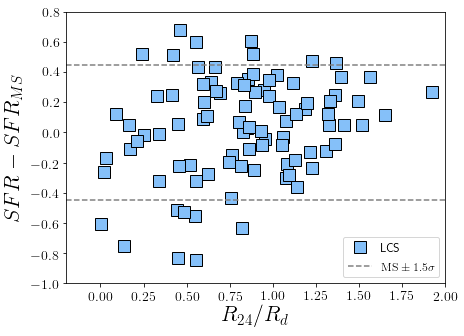

In [198]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9. --ellip 0.5 --HIdef --minssfr -11.5 --cutBT --BT 0.8
decflag = b.lcs.cat['DEC'] < 90.

apexflag = b.lcs.sampleflag & (b.lcs.membflag | b.lcs.infallflag) & b.lcs_mass_sfr_flag & decflag
x = b.lcs.sizeratio[apexflag]
y = b.lcs.cat['logSFR'][apexflag] - get_MS(b.lcs.cat['logMstar'][apexflag])

plt.plot(x,y,'bs',color=lightblue,mec='k',markersize=12,label='LCS')

plt.axhline(y=0.45,ls='--',color='0.5')

plt.axhline(y=-0.45,ls='--',color='0.5',label=r'$\rm MS\pm 1.5\sigma$')

plt.ylim(-1,.8)
plt.xlim(-.2,2)
plt.xlabel('$R_{24}/R_d$',fontsize=22)
plt.ylabel('$SFR - SFR_{MS}$',fontsize=22)
plt.legend(loc='lower right')